# Tarefa 02 

* Andreza Aparecida dos Santos - RA 164213 
* Gil Ribeiro de Carvalho - RA 225323 
* Thamiris Coelho - RA 187506

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    fowlkes_mallows_score,
    adjusted_rand_score)

## Leitura dos Dados

Conjunto possui 1000 dados com 13 atributos cada.

In [2]:
data = pd.read_csv('ex2-data.csv', delim_whitespace=True, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-10.63,-3.91,27.69,2.32,-8.17,-6.15,-2.45,-10.30,-5.62,7.98,5.32,1.35,-4.56
1,12.56,-19.50,4.39,1.53,-3.55,-15.97,-9.16,4.88,5.72,1.58,-3.41,-1.85,2.55
2,4.19,-12.30,-22.25,-6.14,7.47,12.42,6.47,-3.35,-10.22,8.19,5.50,11.08,-2.19
3,-6.38,-18.36,-6.67,-1.42,-3.67,13.01,3.23,-7.46,-3.01,-4.39,-3.40,-1.06,8.25
4,-16.33,0.41,1.56,-10.51,9.37,-3.81,-5.21,-2.16,-6.41,-8.93,-8.05,3.81,2.76


In [3]:
data.shape

(1000, 13)

## K-Means


* Rode o kmeans com k de 2 a 15.
* Use silhueta e pelo menos alguma outra medida interna de qualidade
* moste os graficos dessas medidas versus o k


In [4]:
n_clusters = range(2,16)
silhouette_scores = []
davies_scores = []

for n_cluster in n_clusters:
    clustered = KMeans(n_clusters=n_cluster)
    clustered.fit(data.values)
    
    s_score = silhouette_score(data.values, clustered.labels_)
    davies_score = davies_bouldin_score(data.values, clustered.labels_)
    silhouette_scores.append(s_score)
    davies_scores.append(davies_score)

### Medidas Internas de Qualidade

Além da Silhueta, foi utilizada a medida interna de qualidade chamada Davies-Bouldin.

A medida de silhueta varia entre -1 a 1, sendo 1 o melhor valor, indicando melhor clusterização.

Já a medida Davies-Bouldin possui valor mínimo igual a 0, sendo que quanto mais perto do valor mínimo, melhor a clusterização.

Portanto, para essas métricas, o melhor K será dado pela **silhueta máxima** e **davies minímo**

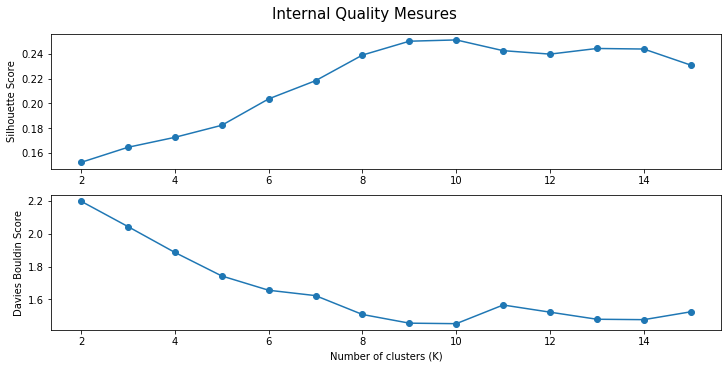

In [5]:
fig, ax = plt.subplots(2, 1, constrained_layout=True, figsize=(10,5))

ax[0].plot(n_clusters, silhouette_scores, marker='o')
ax[0].set_ylabel('Silhouette Score')

ax[1].plot(n_clusters, davies_scores, marker='o')
ax[1].set_ylabel('Davies Bouldin Score')

fig.suptitle('Internal Quality Mesures', fontsize=15)
plt.xlabel("Number of clusters (K)")

plt.show()

## 2. Escolhendo um K

Como apontado anteriormente, para definirmos um K, podemos pegar o que obteve maior valor na métrica silhueta ou o menor valor na métrica Davies-Bouldin.

Observando os gráficos acima, estes parecem espelhados, logo é possível que a maior silhueta e o menor Davies correspondem ao mesmo valor de K.

In [6]:
K_silhouette = silhouette_scores.index(max(silhouette_scores))
K_davies = davies_scores.index(min(davies_scores))
print("Melhor K usando silhouette: {0}\nMelhor K usando davies-boldin: {1}".format(K_silhouette,K_davies))

Melhor K usando silhouette: 8
Melhor K usando davies-boldin: 8


Como os dois pontos correspondem ao mesmo valor de K, podemos escolher o número de clusters igual a **8** .

## 3. GMM

Usando o K escolhido, rodar o GGM
* com gaussianas esférias
* com gaussianas diagonais
* com gaussianas sem restrição


### GMM usando K = 8

In [11]:
ggm_full = GaussianMixture(n_components=8, covariance_type='full', n_init=1).fit(data.values)
ggm_diag = GaussianMixture(n_components=8, covariance_type='diag', n_init=1).fit(data.values)
ggm_spherical = GaussianMixture(n_components=8, covariance_type='spherical', n_init=1).fit(data.values)

In [12]:
gmm_full_preds = ggm_full.predict(data.values)
ggm_diag_preds = ggm_diag.predict(data.values)
ggm_spherical_preds = ggm_spherical.predict(data.values)

## 4. Medidas externas para comparar duas clusterizações

Use pelo menos 2 medidas externas para comparar a solução GGM sem restrição (full) com as outras 2 (esférica e diagonal)


* Índice de Fowlkes e Mallows: índice definido como a média geométrica entre a precisão e o recall. Varia entre 0 e 1, sendo que valores mais próximos de 1 representam maior similaridade entre dois clusters.

* Índice Rand corrigido: índice que computa a similiridade entre dois clusters. Varia entre -1 e 1. Valores próximos de 1 indicam casamento perfeito entre os dois clusters.


In [13]:
fowlkes_full_diag = fowlkes_mallows_score(gmm_full_preds, ggm_diag_preds)
fowlkes_full_spherical = fowlkes_mallows_score(gmm_full_preds, ggm_spherical_preds)

print("Índide de Fowlkes and Mallows\nGMM sem restrições e GGM esférica: {0}\nGGM sem restrições e GGM diagonal: {1}".format(fowlkes_full_spherical,fowlkes_full_diag))

Índide de Fowlkes and Mallows
GMM sem restrições e GGM esférica: 0.629471994790885
GGM sem restrições e GGM diagonal: 0.7128065802373575


In [14]:
adjusted_rand_full_diag = adjusted_rand_score(gmm_full_preds, ggm_diag_preds)
adjusted_rand_full_spherical = adjusted_rand_score(gmm_full_preds, ggm_spherical_preds)

print("Índide de Rand Corrigido\nGMM sem restrições e GGM esférica: {0}\nGGM sem restrições e GGM diagonal: {1}".format(adjusted_rand_full_spherical, adjusted_rand_full_diag))

Índide de Rand Corrigido
GMM sem restrições e GGM esférica: 0.5589544307975864
GGM sem restrições e GGM diagonal: 0.6658155927838233
